In [1]:
%run headers.ipynb
%run dataset.ipynb
%run unet_plots.ipynb
%run loss.ipynb

#### Load Data :

In [2]:
# LoadData_Info_with_print()

In [3]:
LoadData_Info_without_normal_print()

Information about the dataset : 


Total images : 647
437
210

Total masked : 647
437
210



In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test = UNet_dataset_with_valid(0.7,0.1,0.2)
X_train/=255
X_valid/=255
X_test/=255
y_train/=255
y_valid/=255
y_test/=255

In [5]:
# X_train, X_test, y_train, y_test = UNet_dataset(0.7)


In [6]:
data[2]

([], [])

In [7]:
print(len(X_train),len(X_valid),len(X_test),len(y_train),len(y_valid),len(y_test))

452 128 67 452 128 67


In [8]:
# len(X_train),len(X_test)

#### Sample Plot:

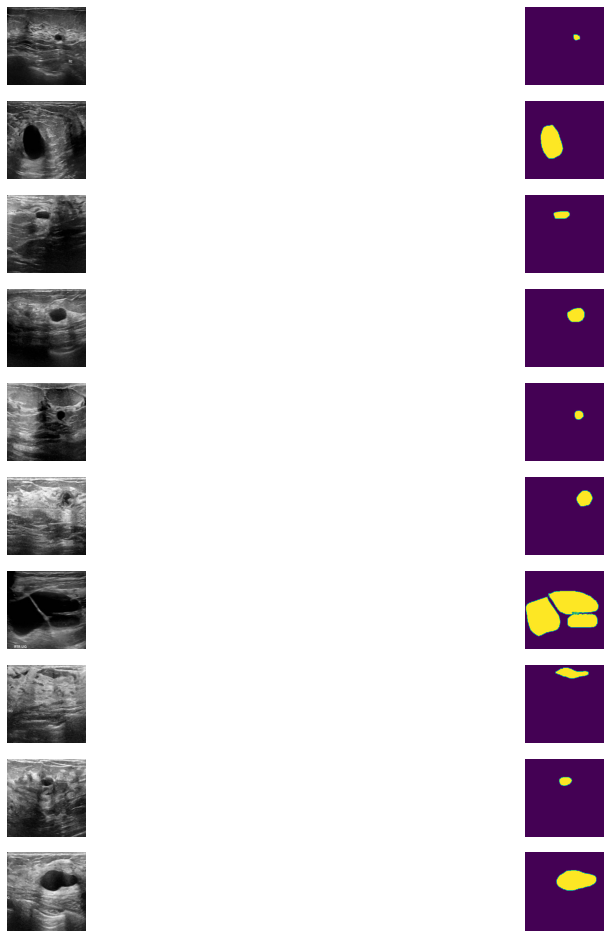

In [11]:
x=100
plot_sample(data[0][0],data[0][1],[],x,x+10)

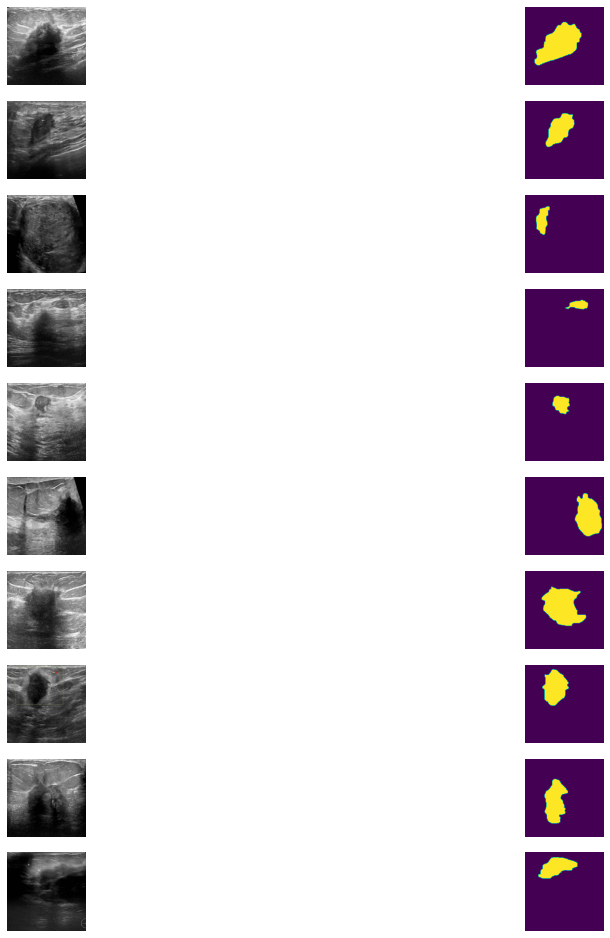

In [50]:
plot_sample(data[1][0],data[1][1],[],x,x+10)
# plot_sample(data[2][0],data[2][1],[],0,3)

## Unet Construction:

In [13]:
%run unet_architecture_1.ipynb

In [14]:
input_shape = (256, 256, 3)
unet_model = unet_build(input_shape)
unet_model.summary()

1
2
3
4
Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________

In [15]:
input_shape = (256, 256, 3)
a_unet_model = attention_unet_build(input_shape)
# a_unet_model.summary()

5
6
7
8


In [16]:
# %%html
# <img src="https://i.ibb.co/gPzyV5P/download.png" />

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# unet_model.compile(optimizer='adam', loss=Dice_BCELoss,metrics = [DiceBCELoss])
# unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss=Dice_BCELoss,metrics=[DiceBCELoss])
# unet_model.compile(optimizer=Adam(learning_rate=1e-5), loss=BCE_loss,metrics=[DiceBCELoss])
# unet_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss=dice_loss,metrics=['accuracy'])

In [19]:
unet_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
now = time.time()
mlsec  = repr(now).split('.')[1][:3]
# f_name = time.strftime("%Y-%m-%d %H.%M.%S.{}".format(mlsec), time.localtime(now))
f_name = ""
filepath=r'C:\Users\laksa\OneDrive\Desktop\cnn\callbacks'+'\\'+f_name
filepath+='_BCE-1e-3-0_new.hdf5'
filepath

'C:\\Users\\laksa\\OneDrive\\Desktop\\cnn\\callbacks\\_BCE-1e-3-0_new.hdf5'

In [21]:
checkpoint              = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',verbose=1,save_best_only=True)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=5,verbose=1,factor=0.5,minlr=0.0000001)
# early                   = EarlyStopping(patience=6, monitor='val_loss')

# callbacks=[checkpoint]
# callbacks = [checkpoint, learning_rate_reduction]
callbacks = [checkpoint]
history = unet_model.fit(X_train,y_train,batch_size=25,epochs=100,validation_data=(X_valid,y_valid),callbacks=callbacks)
# history = unet_model.fit(X_train,y_train,batch_size=10,epochs=15,callbacks=callbacks)

Epoch 1/100
19/19 [==============================] - 22s 681ms/step - loss: 0.5744 - accuracy: 0.7372 - val_loss: 12.9889 - val_accuracy: 0.0940

Epoch 00001: val_accuracy improved from -inf to 0.09404, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-0_new.hdf5
Epoch 2/100
19/19 [==============================] - 10s 522ms/step - loss: 0.3967 - accuracy: 0.8902 - val_loss: 1.0147 - val_accuracy: 0.5831

Epoch 00002: val_accuracy improved from 0.09404 to 0.58314, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-0_new.hdf5
Epoch 3/100
19/19 [==============================] - 10s 522ms/step - loss: 0.3600 - accuracy: 0.8956 - val_loss: 0.4349 - val_accuracy: 0.9097

Epoch 00003: val_accuracy improved from 0.58314 to 0.90974, saving model to C:\Users\laksa\OneDrive\Desktop\cnn\callbacks\_BCE-1e-3-0_new.hdf5
Epoch 4/100
19/19 [==============================] - 10s 522ms/step - loss: 0.3293 - accuracy: 0.9026 - val_loss: 8.3253 - val_accuracy: 0

19/19 [==============================] - 10s 522ms/step - loss: 0.0718 - accuracy: 0.9633 - val_loss: 0.1600 - val_accuracy: 0.9427

Epoch 00038: val_accuracy did not improve from 0.94556
Epoch 39/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0835 - accuracy: 0.9594 - val_loss: 0.1548 - val_accuracy: 0.9359

Epoch 00039: val_accuracy did not improve from 0.94556
Epoch 40/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0797 - accuracy: 0.9600 - val_loss: 0.1656 - val_accuracy: 0.9400

Epoch 00040: val_accuracy did not improve from 0.94556
Epoch 41/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0666 - accuracy: 0.9655 - val_loss: 0.1488 - val_accuracy: 0.9414

Epoch 00041: val_accuracy did not improve from 0.94556
Epoch 42/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0609 - accuracy: 0.9666 - val_loss: 0.1560 - val_accuracy: 0.9437

Epoch 00042: val_accuracy did not improve from 0.94556
Epoch 43

19/19 [==============================] - 10s 544ms/step - loss: 0.0485 - accuracy: 0.9702 - val_loss: 0.1838 - val_accuracy: 0.9384

Epoch 00079: val_accuracy did not improve from 0.94556
Epoch 80/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0433 - accuracy: 0.9718 - val_loss: 0.1826 - val_accuracy: 0.9409

Epoch 00080: val_accuracy did not improve from 0.94556
Epoch 81/100
19/19 [==============================] - 10s 523ms/step - loss: 0.0405 - accuracy: 0.9729 - val_loss: 0.1810 - val_accuracy: 0.9408

Epoch 00081: val_accuracy did not improve from 0.94556
Epoch 82/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0457 - accuracy: 0.9706 - val_loss: 0.1632 - val_accuracy: 0.9417

Epoch 00082: val_accuracy did not improve from 0.94556
Epoch 83/100
19/19 [==============================] - 10s 522ms/step - loss: 0.0466 - accuracy: 0.9707 - val_loss: 0.1690 - val_accuracy: 0.9399

Epoch 00083: val_accuracy did not improve from 0.94556
Epoch 84

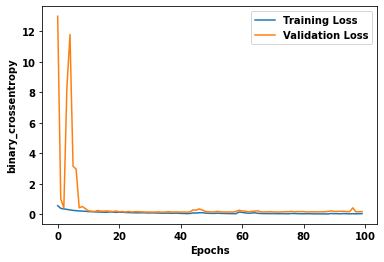

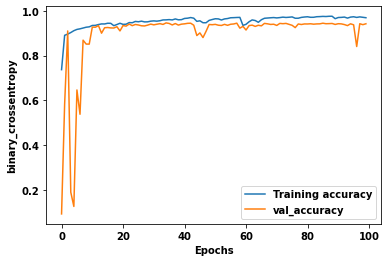

In [22]:
plot_train_val_loss_(history)
plot_train_val_acc_(history)

In [23]:
model_best = load_model(filepath,custom_objects={'DiceBCELoss':DiceBCELoss,'BCE_loss':BCE_loss,'dice_coef':dice_coef})

In [51]:
model_best = unet_model

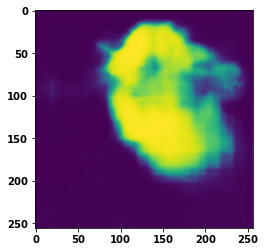

In [52]:
pred[0]
plt.imshow(pred[5])

In [53]:
%run unet_plots.ipynb

In [54]:
def plot_sample(X, y,z,start,val):
    fig = plt.figure(figsize=(17, 17))
    if len(z)==0 :
        index=start
        diff = val*2-start*2
        for i in range(0,diff,2):
            fig.add_subplot(val-start,2,i+1)
            plt.imshow(X[index])
            plt.axis('off')

            fig.add_subplot(val-start,2,i+2)
            plt.imshow(y[index])
            plt.axis('off')
            index+=1
    else:
        index=start
        for i in range(0,val*3-start*3,3):
            fig.add_subplot(val,3,i+1)
            plt.imshow(X[index])
            plt.axis('off')

            fig.add_subplot(val,3,i+2)
            plt.imshow(y[index])
            plt.axis('off')
            
            fig.add_subplot(val,3,i+3)
            plt.imshow(z[index])
            plt.axis('off')
            
            index+=1

In [55]:
pred=model_best.predict(X_test)

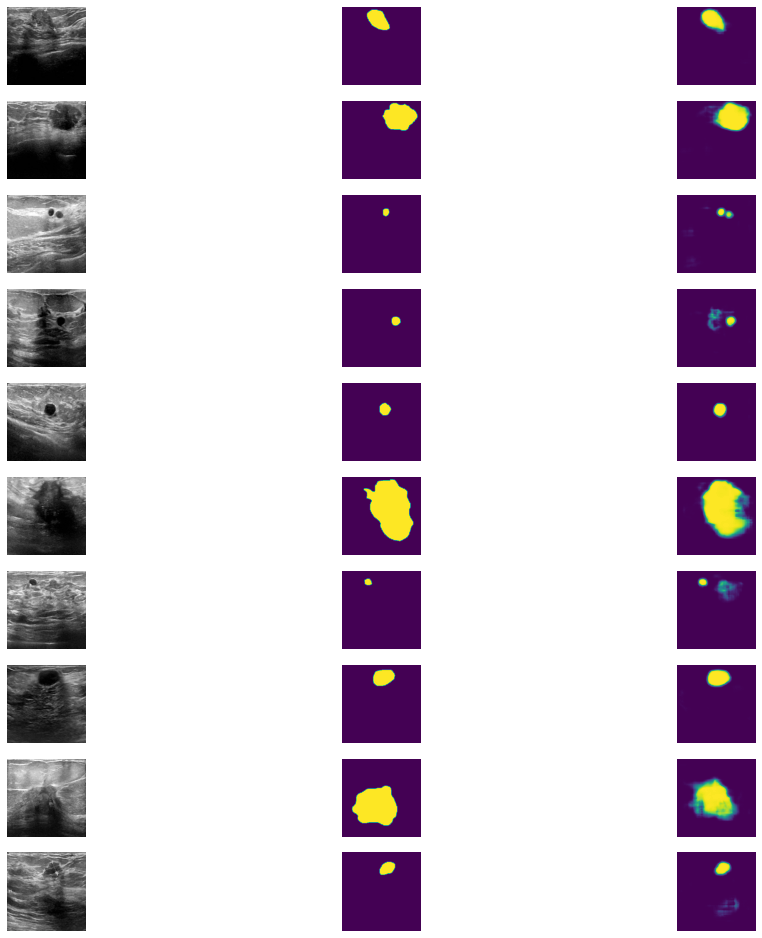

In [56]:
plot_sample(X_test,y_test,pred,0,10)

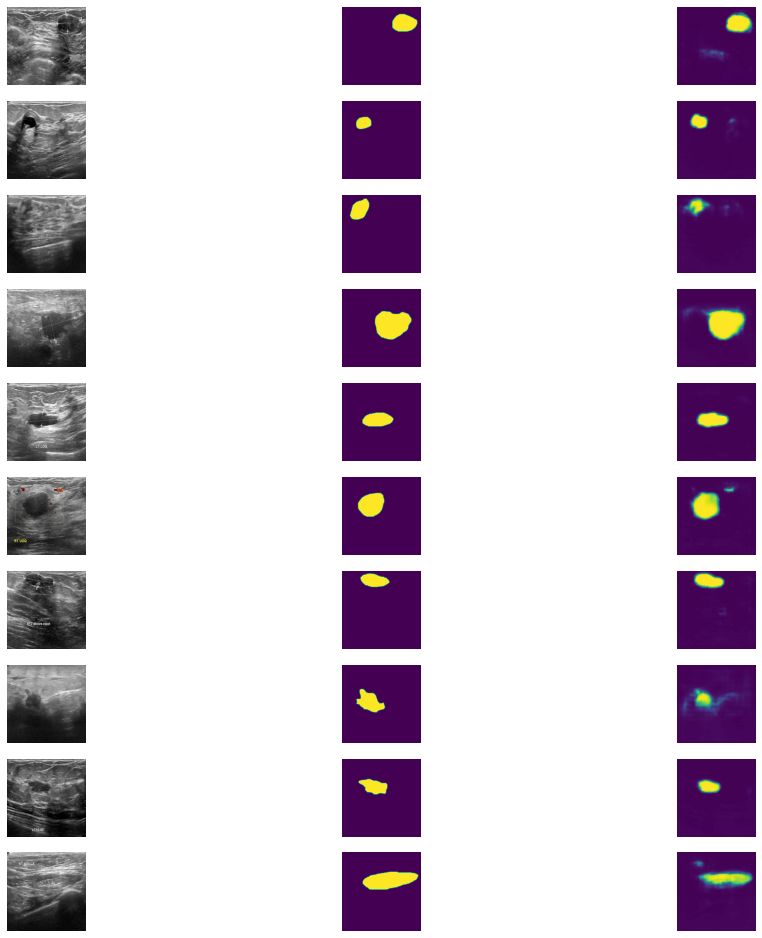

In [46]:
pred_train=model_best.predict(X_train)
plot_sample(X_train,y_train,pred_train,0,10)

In [26]:
# os.listdir(r"D:\tumor\resized\malignant")
# os.listdir(r"D:\tumor\resized\benign")
# os.listdir(r"D:\tumor\resized\normal")

## Predict Benign Tumor :

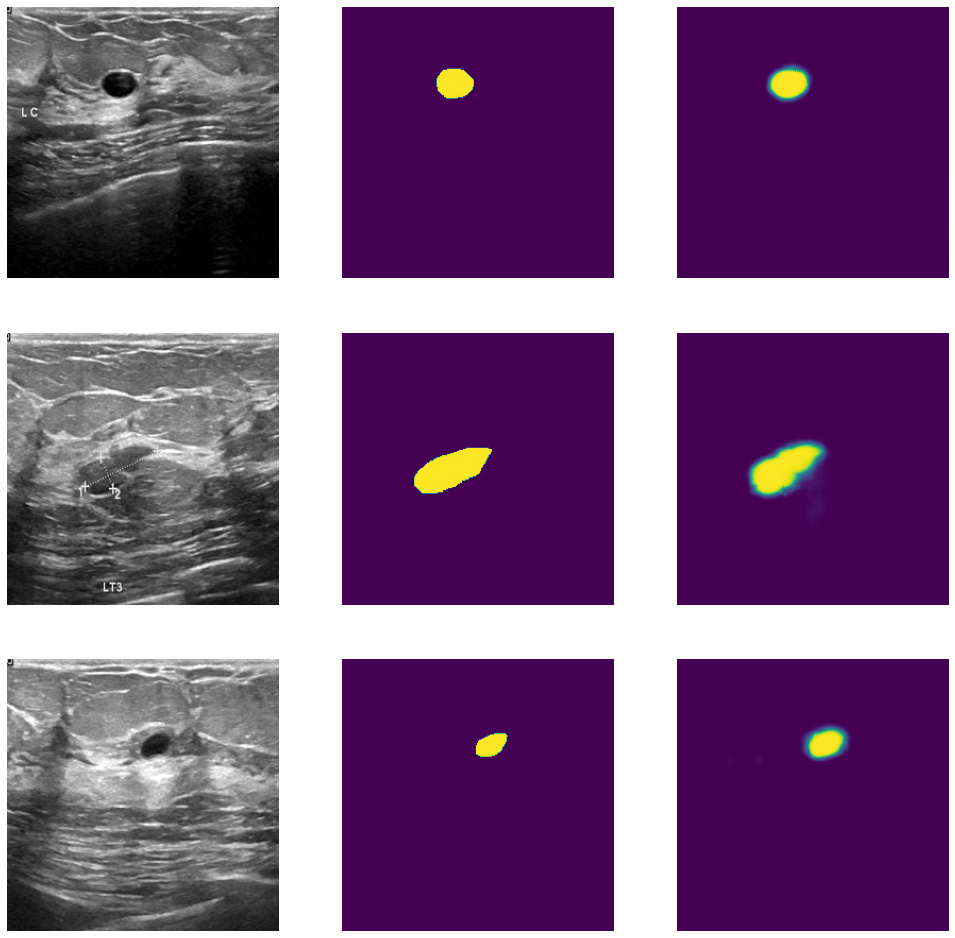

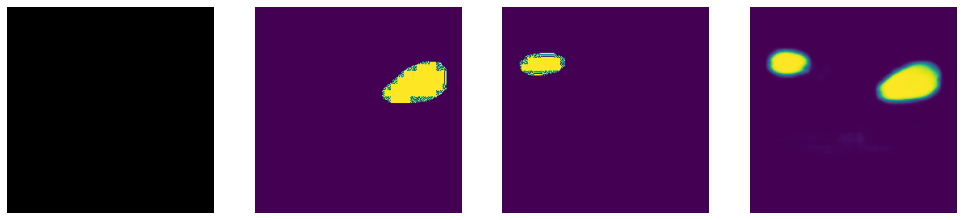

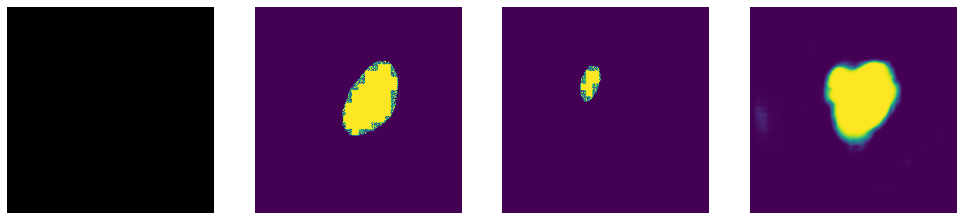

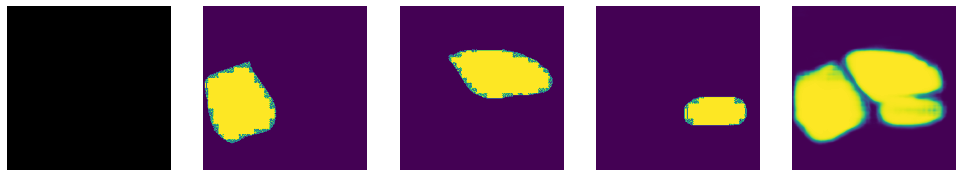

In [57]:
img1=plt.imread(directory+subdir[0]+'benign (208) resized.jpg')/255
imgm1=plt.imread(directory+subdir[0]+'benign (208)_mask resized_greyscale.jpg')/255
img2=plt.imread(directory+subdir[0]+'benign (226) resized.jpg')/255
imgm2=plt.imread(directory+subdir[0]+'benign (226)_mask resized_greyscale.jpg')/255
img3=plt.imread(directory+subdir[0]+'benign (21) resized.jpg')/255
imgm3=plt.imread(directory+subdir[0]+'benign (21)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3],[imgm1,imgm2,imgm3],model_best.predict(np.array([img1,img2,img3])),0,3)

img4=plt.imread(directory+subdir[0]+'benign (100) resized.jpg')/255
imgm4=plt.imread(directory+subdir[0]+'benign (100)_mask resized_greyscale.jpg')/255
imgm4_1=plt.imread(directory+subdir[0]+'benign (100)_mask_1 resized_greyscale.jpg')/255

plot_sample_single([img4,imgm4,imgm4_1])

img5=plt.imread(directory+subdir[0]+'benign (181) resized.jpg')/255
imgm5=plt.imread(directory+subdir[0]+'benign (181)_mask resized_greyscale.jpg')/255
imgm5_1=plt.imread(directory+subdir[0]+'benign (181)_mask_1 resized_greyscale.jpg')/255

plot_sample_single([img5,imgm5,imgm5_1])

img6=plt.imread(directory+subdir[0]+'benign (195) resized.jpg')/255
imgm6=plt.imread(directory+subdir[0]+'benign (195)_mask resized_greyscale.jpg')/255
imgm6_1=plt.imread(directory+subdir[0]+'benign (195)_mask_1 resized_greyscale.jpg')/255
imgm6_2=plt.imread(directory+subdir[0]+'benign (195)_mask_2 resized_greyscale.jpg')/255

plot_sample_single([img6,imgm6,imgm6_1,imgm6_2])

## Predict Malignant Tumor :

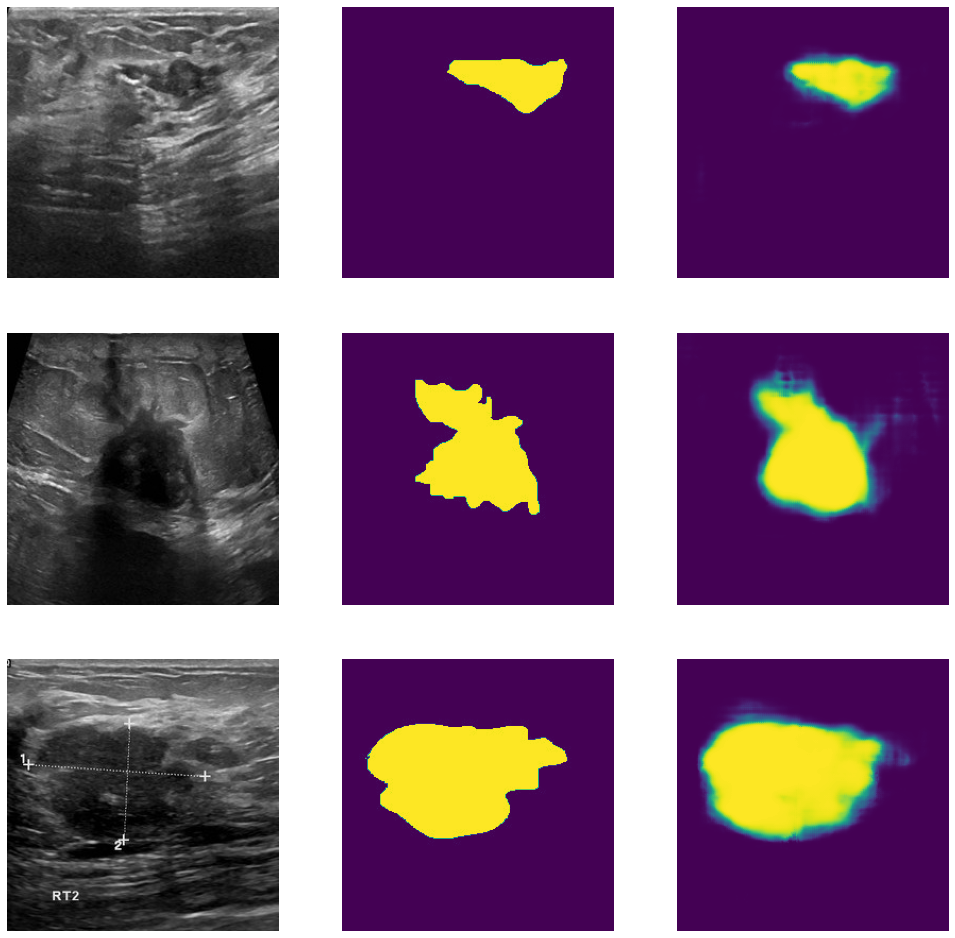

In [58]:
img1=plt.imread(directory+subdir[1]+'malignant (141) resized.jpg')/255
imgm1=plt.imread(directory+subdir[1]+'malignant (141)_mask resized_greyscale.jpg')/255

img2=plt.imread(directory+subdir[1]+'malignant (101) resized.jpg')/255
imgm2=plt.imread(directory+subdir[1]+'malignant (101)_mask resized_greyscale.jpg')/255

img3=plt.imread(directory+subdir[1]+'malignant (111) resized.jpg')/255
imgm3=plt.imread(directory+subdir[1]+'malignant (111)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3],[imgm1,imgm2,imgm3],model_best.predict(np.array([img1,img2,img3])),0,3)

## Predict Normal Ultrasound :

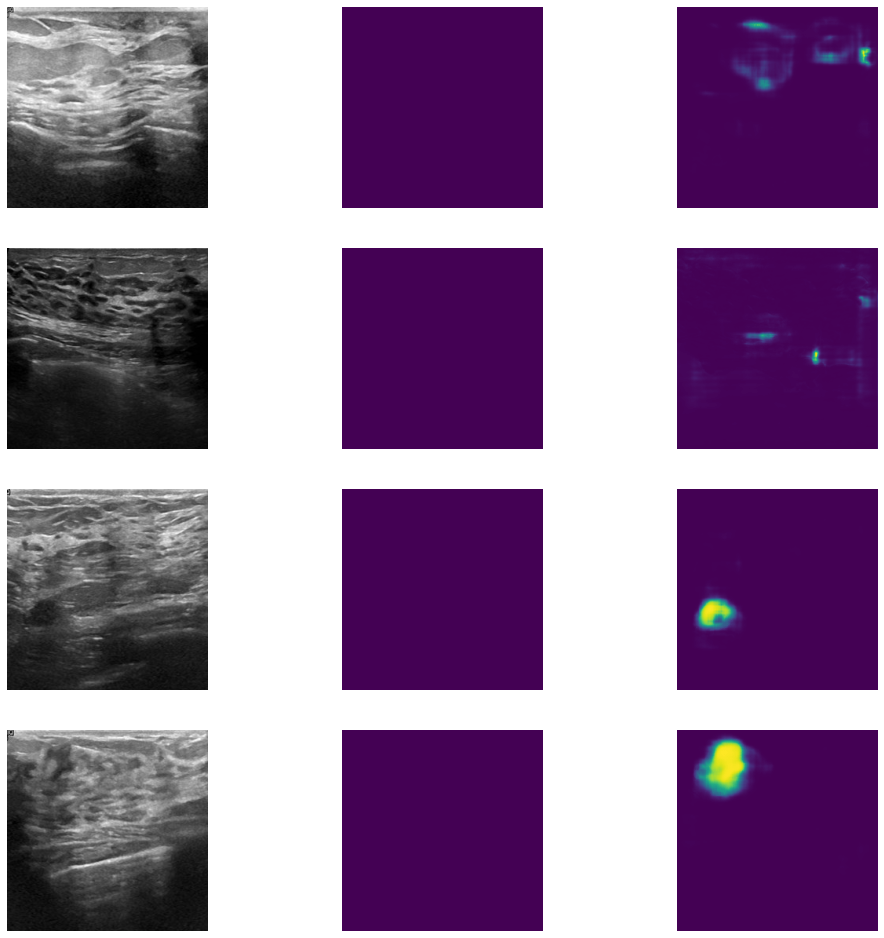

In [59]:
img1=plt.imread(directory+subdir[2]+'normal (102) resized.jpg')/255
imgm1=plt.imread(directory+subdir[2]+'normal (102)_mask resized_greyscale.jpg')/255

img2=plt.imread(directory+subdir[2]+'normal (123) resized.jpg')/255
imgm2=plt.imread(directory+subdir[2]+'normal (123)_mask resized_greyscale.jpg')/255

img3=plt.imread(directory+subdir[2]+'normal (99) resized.jpg')/255
imgm3=plt.imread(directory+subdir[2]+'normal (99)_mask resized_greyscale.jpg')/255

img4=plt.imread(directory+subdir[2]+'normal (1) resized.jpg')/255
imgm4=plt.imread(directory+subdir[2]+'normal (1)_mask resized_greyscale.jpg')/255

plot_sample([img1,img2,img3,img4],[imgm1,imgm2,imgm3,imgm4],model_best.predict(np.array([img1,img2,img3,img4])),0,4)

In [30]:
dice_coef(pred,y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9076102>